In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from datetime import datetime
from citipy import citipy
import json
from config import weather_api_key
import time
from scipy.stats import linregress
#from config import g_key
#import gmaps

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key


# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Run an API request for each of the cities.
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ahipara
Processing Record 2 of Set 1 | ponta do sol
Processing Record 3 of Set 1 | tingi
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 1 | vardo
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | addi ugri
City not found. Skipping...
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | outjo
Processing Record 11 of Set 1 | khatanga
Processing Record 12 of Set 1 | sitka
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | lukovetskiy
Processing Record 16 of Set 1 | kaitangata
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | paamiut
Processing Record 21 of Set 1 | barentsburg
City not found. S

Processing Record 38 of Set 4 | bambous virieux
Processing Record 39 of Set 4 | carutapera
Processing Record 40 of Set 4 | lolua
City not found. Skipping...
Processing Record 41 of Set 4 | lorengau
Processing Record 42 of Set 4 | sao filipe
Processing Record 43 of Set 4 | buta
Processing Record 44 of Set 4 | roccastrada
Processing Record 45 of Set 4 | bardiyah
Processing Record 46 of Set 4 | port alfred
Processing Record 47 of Set 4 | tura
Processing Record 48 of Set 4 | iqaluit
Processing Record 49 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 50 of Set 4 | havoysund
Processing Record 1 of Set 5 | kohima
Processing Record 2 of Set 5 | hasaki
Processing Record 3 of Set 5 | nikolskoye
Processing Record 4 of Set 5 | port blair
Processing Record 5 of Set 5 | srandakan
Processing Record 6 of Set 5 | saint george
Processing Record 7 of Set 5 | vao
Processing Record 8 of Set 5 | broome
Processing Record 9 of Set 5 | skibbereen
Processing Record 10 of Set 5 | gravdal


Processing Record 28 of Set 8 | nioaque
Processing Record 29 of Set 8 | ostrovnoy
Processing Record 30 of Set 8 | grand gaube
Processing Record 31 of Set 8 | shitkino
Processing Record 32 of Set 8 | lompoc
Processing Record 33 of Set 8 | tomari
Processing Record 34 of Set 8 | saiha
Processing Record 35 of Set 8 | gweru
Processing Record 36 of Set 8 | aklavik
Processing Record 37 of Set 8 | tatarastii de sus
City not found. Skipping...
Processing Record 38 of Set 8 | viedma
Processing Record 39 of Set 8 | marcona
City not found. Skipping...
Processing Record 40 of Set 8 | nam phong
Processing Record 41 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 42 of Set 8 | auch
Processing Record 43 of Set 8 | estevan
Processing Record 44 of Set 8 | rocha
Processing Record 45 of Set 8 | rosetta
Processing Record 46 of Set 8 | asau
Processing Record 47 of Set 8 | nishihara
Processing Record 48 of Set 8 | paracuru
Processing Record 49 of Set 8 | atar
Processing Record 50 of Set 8 |

Processing Record 11 of Set 12 | presidencia roque saenz pena
Processing Record 12 of Set 12 | belyy gorodok
Processing Record 13 of Set 12 | marzuq
Processing Record 14 of Set 12 | teknaf
Processing Record 15 of Set 12 | tapaua
City not found. Skipping...
Processing Record 16 of Set 12 | ardesen
Processing Record 17 of Set 12 | lahaina
Processing Record 18 of Set 12 | tautira
Processing Record 19 of Set 12 | fukue
Processing Record 20 of Set 12 | lloydminster
Processing Record 21 of Set 12 | lakefield
Processing Record 22 of Set 12 | whitehorse
Processing Record 23 of Set 12 | kishtwar
Processing Record 24 of Set 12 | suntar
Processing Record 25 of Set 12 | husavik
Processing Record 26 of Set 12 | dudinka
Processing Record 27 of Set 12 | kargil
Processing Record 28 of Set 12 | goderich
Processing Record 29 of Set 12 | georgiyevka
Processing Record 30 of Set 12 | binzhou
Processing Record 31 of Set 12 | grimari
City not found. Skipping...
Processing Record 32 of Set 12 | novyy urengoy


In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ahipara,-35.1667,173.1667,55.38,90,100,8.88,NZ,2021-10-02 18:59:32
1,Ponta Do Sol,32.6667,-17.1000,74.71,80,1,2.84,PT,2021-10-02 18:58:25
2,Tingi,-11.3000,35.0333,70.84,42,5,4.43,TZ,2021-10-02 19:03:07
3,Hermanus,-34.4187,19.2345,51.91,55,100,7.49,ZA,2021-10-02 19:03:07
4,Vardo,70.3705,31.1107,48.92,86,96,26.66,NO,2021-10-02 19:03:08
...,...,...,...,...,...,...,...,...,...
558,Boa Vista,2.8197,-60.6733,96.78,36,75,5.75,BR,2021-10-02 19:06:06
559,Imbituba,-28.2400,-48.6703,67.89,79,100,5.19,BR,2021-10-02 19:06:06
560,Turtas,58.9417,69.1325,33.19,94,100,5.59,RU,2021-10-02 19:06:07
561,Mongoumba,3.6415,18.5936,71.37,96,88,4.14,CF,2021-10-02 19:06:07


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

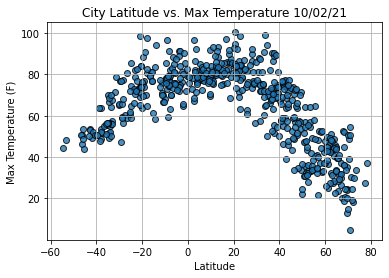

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

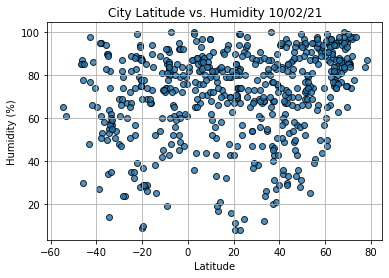

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

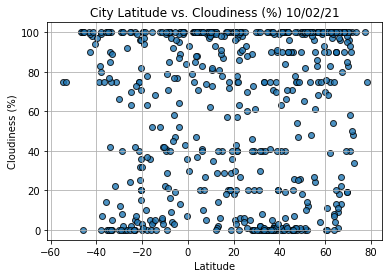

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

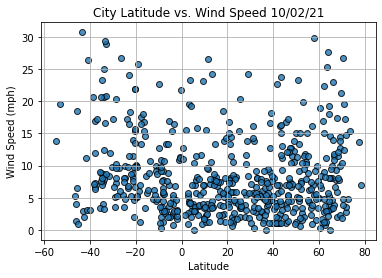

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()